In [1]:
import pandas as pd
import numpy as np

In [2]:
cleaned_features = pd.read_csv("larger_imputed_features.csv", encoding='utf-8')

In [3]:
target = cleaned_features.GENTRIFIED.values

In [4]:
cleaned_features.drop('GENTRIFIED', axis=1, inplace=True)

In [5]:
novel_features = cleaned_features[['''ACS_09_S2101_HC03_EST_VC37_Nonveterans__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Bachelor's_degree_or_higher_100scale''',
'ACS_09_B25018_HD01_VD01_Estimate__Median_number_of_rooms_100scale',
'ACS_09_B25081_HD01_VD07_Estimate__Housing_units_with_a_mortgage,_contract_to_purchase,_or_similar_debt__No_second_mortgage_and_no_home_equity_loan_100scale',
'ACS_09_S2201_HC02_EST_VC03_Households_receiving_food_stamps__Estimate__Households__With_children_under_18_years_100scale', 
'''ACS_09_S2101_HC01_EST_VC36_Total__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Some_college_or_associate's_degree_100scale''',
'ACS_09_S2201_HC03_EST_VC02_Households_not_receiving_food_stamps__Estimate__Households__With_one_or_more_people_60_years_and_over_100scale',
                                  'ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale'
                                  ,'ACS_09_B25003_HD01_VD02_Estimate__Owner_occupied_100scale']]

In [ ]:
# novel_features.to_csv('five_features.csv', encoding='utf-8', header=False)

In [8]:
novel_features.shape

(3874, 8)

In [9]:
novel_features.columns

Index(['ACS_09_S2101_HC03_EST_VC37_Nonveterans__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Bachelor's_degree_or_higher_100scale',
       'ACS_09_B25018_HD01_VD01_Estimate__Median_number_of_rooms_100scale',
       'ACS_09_B25081_HD01_VD07_Estimate__Housing_units_with_a_mortgage,_contract_to_purchase,_or_similar_debt__No_second_mortgage_and_no_home_equity_loan_100scale',
       'ACS_09_S2201_HC02_EST_VC03_Households_receiving_food_stamps__Estimate__Households__With_children_under_18_years_100scale',
       'ACS_09_S2101_HC01_EST_VC36_Total__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Some_college_or_associate's_degree_100scale',
       'ACS_09_S2201_HC03_EST_VC02_Households_not_receiving_food_stamps__Estimate__Households__With_one_or_more_people_60_years_and_over_100scale',
       'ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale',
       'ACS_09_B25003_HD01_VD02_Estimate__Own

In [10]:
target.shape

(3874,)

In [8]:
features_array  = novel_features.values

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_array, target)

In [13]:
clf.predict_proba(features_array[:10])

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [9]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, random_state=0)

In [10]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=0, strategy='mean', axis=0)
imp.fit(features_array)

Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)

In [13]:
features_train_imputed = imp.transform(features_train)
features_test_imputed = imp.transform(features_test)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score


classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                        subsample=.8, max_features=.5,
                                        random_state=0)

pipeline = Pipeline([
    ('imp', imp),
    ('clf', classifier),
])

scores = cross_val_score(pipeline, features_array, target, cv=5, n_jobs=4,
                         scoring='accuracy')

print(scores.min(), scores.mean(), scores.max())

0.877577319588 0.881262154026 0.885012919897


In [23]:
from sklearn.grid_search import GridSearchCV

In [24]:
gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_array, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=4,
       param_grid={'max_depth': [3, 4, 5], 'learning_rate': [0.05, 0.1, 0.5], 'max_features': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [25]:
params = {
    'imp__strategy': ['mean', 'median'],
    'clf__max_features': [0.5, 1],
    'clf__max_depth': [3, 4, 5],
}
gs = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)), ('clf', GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.5, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=0, subsample=0.8, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=4,
       param_grid={'clf__max_depth': [3, 4, 5], 'imp__strategy': ['mean', 'median'], 'clf__max_features': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

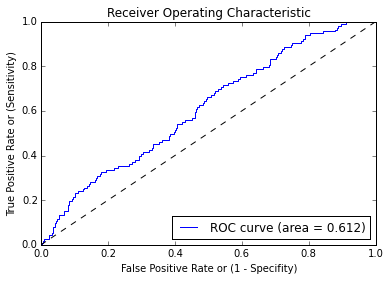

In [28]:
% matplotlib inline
import matplotlib.pyplot as plt

plot_roc_curve(target_test, gs.predict_proba(features_test))

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [17]:
target_predicted = logreg.predict(features_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.88

In [19]:
logreg.score(features_test, target_test)

0.88

In [20]:
logreg.coef_

array([[ 0.03043955, -0.0114538 , -0.03384797,  0.00050553, -0.00947017,
         0.00641674,  0.00462321,  0.01290803]])

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[680   2]
 [ 91   2]]


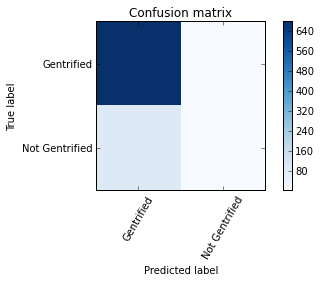

In [22]:
% matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion(cm, target_names = ['Gentrified', 'Not Gentrified'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

In [24]:
cm.sum(axis=1)

array([682,  93])

In [25]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 0.99706745  0.00293255]
 [ 0.97849462  0.02150538]]


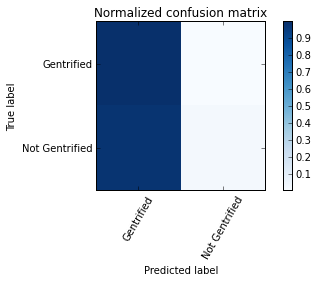

In [26]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

In [27]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['Gentrified', 'Not Gentrified']))

                precision    recall  f1-score   support

    Gentrified       0.88      1.00      0.94       682
Not Gentrified       0.50      0.02      0.04        93

   avg / total       0.84      0.88      0.83       775



In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

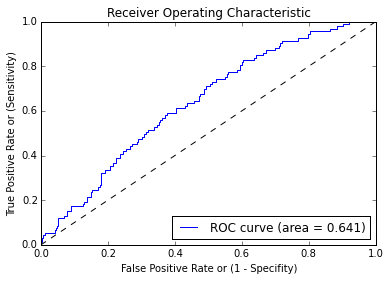

In [29]:
# However the ROC-AUC score of a random model is expected to 0.5 on average while the accuracy score of a random model
# depends on the class imbalance of the data. ROC-AUC can be seen as a way to callibrate the predictive accuracy of a model 
# against class imbalance.


target_predicted_prob = logreg.predict_proba(features_test)
plot_roc_curve(target_test,target_predicted_prob)

In [30]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=3)

In [31]:
# So instead of using a single train / test split, we can use a group of 
# them and compute the min, max and mean scores as an estimation of the real test score while not 
# underestimating the variability:

scores

array([ 0.88312693,  0.88071263,  0.88458559])

In [32]:
scores.min(), scores.max(), scores.mean()

(0.88071262587141752, 0.8845855925639039, 0.88280838447328058)

In [33]:
scores = cross_val_score(logreg, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.62580072638371398, 0.64763268877328495, 0.67044746647233744)

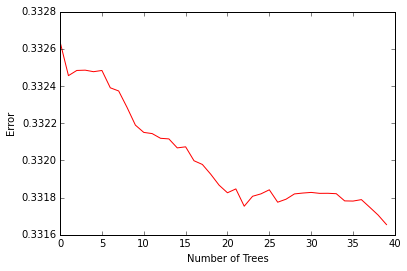

In [37]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss


errors = []
growing_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,  
                                    warm_start=True, random_state=1000, min_samples_leaf=100)
for i in range(40):
    growing_rf.fit(features_train, target_train)
    growing_rf.n_estimators += 10
    errors.append(log_loss(target, growing_rf.predict_proba(features_array)))

_ = plt.plot(errors, '-r')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

In [38]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_array, target)

Wall time: 14.3 s


In [39]:
sorted(gs.grid_scores_, key = lambda x: x.mean_validation_score, reverse=True)

[mean: 0.66999, std: 0.03046, params: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5},
 mean: 0.66158, std: 0.03184, params: {'max_depth': 3, 'learning_rate': 0.05, 'max_features': 1},
 mean: 0.65342, std: 0.02825, params: {'max_depth': 4, 'learning_rate': 0.05, 'max_features': 0.5},
 mean: 0.65267, std: 0.02501, params: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 1},
 mean: 0.64987, std: 0.03175, params: {'max_depth': 3, 'learning_rate': 0.1, 'max_features': 0.5},
 mean: 0.64665, std: 0.01900, params: {'max_depth': 3, 'learning_rate': 0.1, 'max_features': 1},
 mean: 0.64370, std: 0.02798, params: {'max_depth': 5, 'learning_rate': 0.05, 'max_features': 1},
 mean: 0.63706, std: 0.02825, params: {'max_depth': 5, 'learning_rate': 0.05, 'max_features': 0.5},
 mean: 0.63675, std: 0.03060, params: {'max_depth': 4, 'learning_rate': 0.1, 'max_features': 0.5},
 mean: 0.63120, std: 0.03154, params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1},
 mean: 0.62581

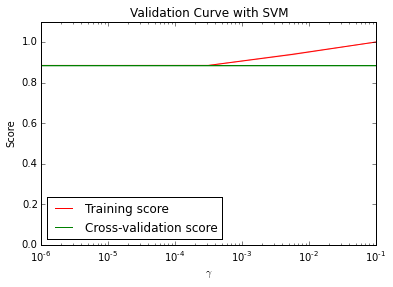

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

X, y = features_array, target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [41]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor()
rf.fit(features_array[:300], target[:300])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [42]:
instances = features_array[[300, 309]]
print("Instance 0 prediction:", rf.predict(instances[0]))
print("Instance 1 prediction:", rf.predict(instances[1]))

Instance 0 prediction: [ 0.2]
Instance 1 prediction: [ 0.1]


In [8]:
#Prediction intervals for pr

from sklearn.ensemble import RandomForestRegressor
import numpy as np

X = features_array
Y = target
size = len(features_array)

trainsize = 400
idx = np.arange(size)
#shuffle the data
np.random.shuffle(idx)
rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1)
rf.fit(X[idx[:trainsize]], Y[idx[:trainsize]])

def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [9]:
err_down, err_up = pred_ints(rf, X[idx[trainsize:]], percentile=90)
 
truth = Y[idx[trainsize:]]
correct = 0.
for i, val in enumerate(truth):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
        
print(correct/len(truth))

0.982153137593552


In [ ]:
# Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

# In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

# For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.
# In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation.

# When doing imputation in pandas, prior to computing the train test split we use data from the test to improve the accuracy of
# the median value that we impute on the training set. This is actually cheating. To avoid this we should compute the median of 
# the features on the training fold and use that median value to do the imputation both on the training and validation fold for 
# a given CV split

In [23]:
import scipy.sparse as sp
from sklearn.preprocessing import Imputer

In [24]:
imp = Imputer(missing_values=0, strategy='mean', axis=0)

In [25]:
imp.fit(features_array)

Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)

In [26]:
features_array

array([[12, 18,  3, ..., 23, 45,  1],
       [21, 21,  3, ..., 37, 54,  1],
       [13, 35,  6, ..., 22, 43,  2],
       ..., 
       [19,  6, 16, ...,  9, 73, 14],
       [22, 46, 34, ..., 49, 37, 43],
       [27, 44, 28, ..., 54, 28, 37]], dtype=int64)